### Data Cleaning

In [1]:
from timeit import default_timer as timer
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import calendar
import time
import scipy.stats

In [2]:
import pandas as pd
mydata = pd.read_csv('card transactions.csv', parse_dates=['Date'], converters={'Merchnum': lambda x: str(x)})
mydata.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [3]:
mydata.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [4]:
mydata.shape

(96753, 10)

In [5]:
# replace empty string to nan
mydata['Merchnum'] = mydata.Merchnum.replace('',np.nan)
# mydata['Merchnum'] = mydata.Merchnum.replace('0',np.nan)

In [6]:
mydata[mydata['Merchnum'].isnull()]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
97,98,5142167414,2006-01-03,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,89.00,0
115,116,5142182128,2006-01-03,NaN,GRAINGER #973,IL,60089.0,P,327.34,0
135,136,5142126842,2006-01-03,NaN,AUTOMATED OFFICE PRODU,MD,20706.0,P,2110.00,0
163,164,5142127276,2006-01-03,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,4444.00,0
168,169,5142132574,2006-01-03,NaN,ROLL CALL NEWSPAPER,DC,20001.0,P,104.69,0
...,...,...,...,...,...,...,...,...,...,...
96621,96622,5142253938,2006-12-30,NaN,OREGON ENVIRONMENTAL COUN,OR,97204.0,P,40.00,0
96651,96652,5142151962,2006-12-30,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,125.00,0
96689,96690,5142166019,2006-12-30,NaN,ADVANCED SEC & CONTROL,GA,30340.0,P,70.50,0
96720,96721,5142178272,2006-12-31,NaN,TRULOGIC SYSTEMS,ON,NaN,P,343.42,0


In [7]:
mydata.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3375
Merch description       0
Merch state          1195
Merch zip            4656
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [8]:
mydata.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

## Data Cleaning

In [9]:
# filter out the transaction type that is NOT p
data=mydata[mydata['Transtype']=='P']
data.shape

(96398, 10)

In [10]:
max_amt=data['Amount'].max()
max_amt

3102045.53

In [11]:
data=data[data['Amount'] != max_amt]

In [12]:
data.shape

(96397, 10)

In [13]:
data['Amount'].max()

47900.0

In [14]:
# find missing value
data.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3198
Merch description       0
Merch state          1020
Merch zip            4300
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [15]:
data.shape

(96397, 10)

### Fill in Merchnum

In [16]:
data[data['Merchnum'].isnull()]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
115,116,5142182128,2006-01-03,NaN,GRAINGER #973,IL,60089.0,P,327.34,0
135,136,5142126842,2006-01-03,NaN,AUTOMATED OFFICE PRODU,MD,20706.0,P,2110.00,0
168,169,5142132574,2006-01-03,NaN,ROLL CALL NEWSPAPER,DC,20001.0,P,104.69,0
201,202,5142140436,2006-01-03,NaN,MONTGOMERY COLLEGE-PHONE,MD,20850.0,P,266.00,0
257,258,5142257292,2006-01-04,NaN,ARGENT CHEMICAL LABS,WA,98052.0,P,240.00,0
...,...,...,...,...,...,...,...,...,...,...
96621,96622,5142253938,2006-12-30,NaN,OREGON ENVIRONMENTAL COUN,OR,97204.0,P,40.00,0
96651,96652,5142151962,2006-12-30,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,125.00,0
96689,96690,5142166019,2006-12-30,NaN,ADVANCED SEC & CONTROL,GA,30340.0,P,70.50,0
96720,96721,5142178272,2006-12-31,NaN,TRULOGIC SYSTEMS,ON,NaN,P,343.42,0


In [17]:
# Fill in null Merchnum

# Create a df for non-null merch description
df_merchnum = pd.DataFrame()
l_d =[]
l_m =[]
for index, md in data[data['Merchnum'].notnull()]['Merch description'].items():
        l_d.append(md)
        l_m.append(data.loc[index,'Merchnum'])
df_merchnum['Merch description'] = l_d
df_merchnum['Merchnum'] = l_m

# pd.Series.mode to find the mode
mapping = df_merchnum.groupby("Merch description")['Merchnum'].agg((lambda x: scipy.stats.mode(x)[0])).to_dict()

# fill in the null merchnum with merch description
data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(mapping))


# assign unknown for adjustments transactions 
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

   
data['Merchnum'] = data['Merchnum'].fillna('unknown')



In [18]:
df_merchnum.groupby("Merch description")['Merchnum'].agg((pd.Series.mode))

Merch description
#9 SOFTWARE                 6000330882278
(ISC)2 CERTIFICATION            590065510
0000000000000000000000      8168600400097
033007 KINKO'S                35068136338
05032 FLYING J              121075089FL96
                                ...      
ZYMARK CORPORATION           988906278331
ZYMAX ENVIROTECHNOLOGY      9612006916900
ZYMED LABORATORIES           679966068337
ZZYZX WORKSTATIONS          6163608306809
ZZYZX WRKSTNS PERIPHERAL    6163608306809
Name: Merchnum, Length: 12483, dtype: object

In [19]:
data.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum                0
Merch description       0
Merch state          1020
Merch zip            4300
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

### Fill In Merch State

In [20]:
# change nan to np.nan
data['Merch zip'] = data['Merch zip'].astype('str')
data['Merch zip'] = data['Merch zip'].replace('nan',np.nan)

In [21]:
data.isnull().sum()


Recnum                  0
Cardnum                 0
Date                    0
Merchnum                0
Merch description       0
Merch state          1020
Merch zip            4300
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [22]:
# Change the data type to string and replace 'nan' string with np.nan
data['Merch zip'] = data['Merch zip'].astype('str')
data['Merch zip'] = data['Merch zip'].replace('nan',np.nan,regex=True)

# Fill in null Merch State

# creating dataframe containing Merch zip and Merch state
# groupby Merch zip and use the corresponding mode to map to state for each Zip
zip_state_df = pd.DataFrame()
list_z =[]
list_s =[]
for index, zips in data[data['Merch state'].notnull()]['Merch zip'].items():
        list_z.append(zips)
        list_s.append(data.loc[index,'Merch state'])
zip_state_df['Merch zip'] = list_z
zip_state_df['Merch state'] = list_s
zip_state = zip_state_df.groupby('Merch zip')['Merch state'].agg((lambda x: scipy.stats.mode(x)[0])).to_dict()
zip_state['926.0'] = 'PR'
zip_state['929.0'] = 'PR'
zip_state['934.0'] = 'PR'
zip_state['902.0'] = 'PR'
zip_state['738.0'] = 'PR'
zip_state['90805.0'] = 'CA'
zip_state['76302.0'] = 'TX'
zip_state['914.0'] = 'PR'
zip_state['9546.0'] = 'CA'
zip_state['680.0'] = 'PR'
zip_state['623.0'] = 'PR'
zip_state['726.0'] = 'PR'
zip_state['936.0'] = 'PR'
zip_state['12108.0'] = 'NY'
zip_state['791.0'] = 'PR'
zip_state['907.0'] = 'PR'
zip_state['922.0'] = 'PR'
zip_state['920.0'] = 'PR'
zip_state['801.0'] = 'VI'
zip_state['31040.0'] = 'GA'
zip_state['41160.0'] = 'KY'
zip_state['681.0'] = 'PR'

# creating DataFrame for non-null Merchnum to match Merch state
# groupby Merchnum and use the corresponding mode to map to state for each Merchnum
merchnum_state_df = pd.DataFrame()
list_n =[]
list_s =[]
for index, zips in data[data['Merch state'].notnull()]['Merchnum'].items():
        list_n.append(zips)
        list_s.append(data.loc[index,'Merch state'])
merchnum_state_df['Merchnum'] = list_n
merchnum_state_df['Merch state'] = list_s
merchnum_state = merchnum_state_df.groupby('Merchnum')['Merch state'].agg((lambda x: scipy.stats.mode(x)[0])).to_dict()

# creating DataFrame for non-null description to match Merch state
# groupby Merchnum and use the corresponding mode to map to state for each Merchnum
merchdes_state_df = pd.DataFrame()
list_d =[]
list_s =[]
for index, zip5 in data[data['Merch state'].notnull()]['Merch description'].items():
        list_d.append(zip5)
        list_s.append(data.loc[index,"Merch state"])
merchdes_state_df['Merch description'] = list_d
merchdes_state_df['Merch state'] = list_s
merchdes_state = merchdes_state_df.groupby('Merch description')['Merch state'].agg((lambda x: scipy.stats.mode(x)[0])).to_dict()

In [23]:
# fill in by mapping with zip, merchnum and merch description
data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_state))
data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
data['Merch state'] = data['Merch state'].fillna(data['Merch description'].map(merchdes_state))

# assign unknown for adjustments transactions
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

data['Merch state']=data['Merch state'].fillna('unknown')

In [24]:

data.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum                0
Merch description       0
Merch state             0
Merch zip            4300
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [25]:
data[data['Merch zip'].isnull()]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
51,52,5142204384,2006-01-02,5000006000095,IBM INTERNET 01000025,NY,NaN,P,20.15,0
54,55,5142146340,2006-01-02,5000006000095,IBM INTERNET 01000025,NY,NaN,P,23.90,0
55,56,5142260984,2006-01-02,5000006000095,IBM INTERNET 01000025,NY,NaN,P,19.95,0
58,59,5142204384,2006-01-02,5000006000095,IBM INTERNET 01000025,NY,NaN,P,20.15,0
59,60,5142204384,2006-01-02,5000006000095,IBM INTERNET 01000025,NY,NaN,P,20.15,0
...,...,...,...,...,...,...,...,...,...,...
96651,96652,5142151962,2006-12-30,unknown,RETAIL DEBIT ADJUSTMENT,unknown,NaN,P,125.00,0
96668,96669,5142195081,2006-12-30,465905123335,DURHAM SAFE & LOCK CO,NC,NaN,P,103.00,0
96720,96721,5142178272,2006-12-31,unknown,TRULOGIC SYSTEMS,ON,NaN,P,343.42,0
96730,96731,5142122644,2006-12-31,unknown,RETAIL DEBIT ADJUSTMENT,unknown,NaN,P,340.79,0


In [26]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [27]:
#zip_state

### Fill in Merch Zip

In [28]:
data['Merch zip']=data['Merch zip'].astype('str')

In [29]:
# Merch zip
# Use non-null merchnum to fill in merch zip:
merchnum_zip_df = pd.DataFrame()
list_num =[]
list_zip =[]
for index, merchnum in data[data['Merch zip'].notnull()]['Merchnum'].items():
        list_num.append(merchnum)
        list_zip.append(data.loc[index,"Merch zip"])
merchnum_zip_df['Merchnum'] = list_num
merchnum_zip_df['Merch zip'] = list_zip
merchnum_zip = merchnum_zip_df.groupby("Merchnum")['Merch zip'].agg((lambda x: scipy.stats.mode(x)[0])).to_dict()

# non-null merch description to fill in merch zip
merchdes_zip_df = pd.DataFrame()
list1 =[]
list2 =[]
for index, merchdes in data[data['Merch zip'].notnull()]['Merch description'].items():
        list1.append(merchdes)
        list2.append(data.loc[index,"Merch zip"])
merchdes_zip_df['Merchdes'] = list1
merchdes_zip_df['Merch zip'] = list2
merchdes_zip = merchdes_zip_df.groupby("Merchdes")['Merch zip'].agg((lambda x: scipy.stats.mode(x)[0])).to_dict()

In [30]:
# fill in by mapping with merchnum and merch description
data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))

# assign unknown for adjustments transactions
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

data['Merch zip'].fillna('unknown')

0        38118.0
1         1803.0
2        20706.0
3        38118.0
4        38118.0
          ...   
96748    41042.0
96749    45248.0
96750    45150.0
96751    92656.0
96752     7606.0
Name: Merch zip, Length: 96397, dtype: object

In [31]:
data.isnull().sum()

Recnum               0
Cardnum              0
Date                 0
Merchnum             0
Merch description    0
Merch state          0
Merch zip            0
Transtype            0
Amount               0
Fraud                0
dtype: int64

In [32]:
data['Merch zip'] = data['Merch zip'].astype(str).str.replace('.0', '')
data['Merch zip'] = data['Merch zip'].apply(lambda x: '{0:0>5}'.format(x))

<ipython-input-32-862bb53289e4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Merch zip'] = data['Merch zip'].astype(str).str.replace('.0', '')


In [33]:
# Change Card num to string
data['Cardnum']=data['Cardnum'].astype('str')


In [34]:
data.dtypes

Recnum                        int64
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [35]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

### Create Variables

In [36]:
data.head().T

,0,1,2,3,4
Recnum,1,2,3,4,5
Cardnum,5142190439,5142183973,5142131721,5142148452,5142190439
Date,2006-01-01 00:00:00,2006-01-01 00:00:00,2006-01-01 00:00:00,2006-01-01 00:00:00,2006-01-01 00:00:00
Merchnum,5509006296254,61003026333,4503082993600,5509006296254,5509006296254
Merch description,FEDEX SHP 12/23/09 AB#,SERVICE MERCHANDISE #81,OFFICE DEPOT #191,FEDEX SHP 12/28/09 AB#,FEDEX SHP 12/23/09 AB#
Merch state,TN,MA,MD,TN,TN
Merch zip,38118,00013,00006,38118,38118
Transtype,P,P,P,P,P
Amount,3.62,31.42,178.49,3.62,3.62
Fraud,0,0,0,0,0


In [37]:
data.dtypes

Recnum                        int64
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [38]:
# VT's trail 5/5
data['card_merch'] = data['Cardnum'] + data['Merchnum']
data['card_state'] = data['Cardnum'] + data['Merch state']
data['card_zip'] = data['Cardnum'] + data['Merch zip']
data['merch_zip']=data.Merchnum+data['Merch zip']
data['merch_state']=data.Merchnum+data['Merch state']
data['card_merch_zip']=data.Cardnum+data['Merchnum']+data['Merch zip']
data['card_merch_state']=data.Cardnum+data['Merchnum']+data['Merch state']
data['card_state_zip']=data.Cardnum+data['Merchnum']+data['Merch state']+data['Merch zip']
data['merch_state_zip']=data.Merchnum+data['Merch state']+data['Merch zip']

### Target Encoding / Risk Table Variables

In [39]:
data['dow']=data.Date.apply(lambda x: calendar.day_name[x.weekday()])

In [40]:
train_test=data[data.Date<'2006-11-01']

In [41]:
# statistical smoothing
c=4; nmid=20; y_avg=train_test['Fraud'].mean()
y_dow=train_test.groupby('dow')['Fraud'].mean()
num=train_test.groupby('dow').size() # count
y_dow_smooth=y_avg+(y_dow - y_avg)/(1+np.exp(-(num-nmid)/c))
data['dow_risk']=data.dow.map(y_dow_smooth)

In [42]:
y_dow=y_dow.reset_index()
cats=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y_dow['dow']=pd.Categorical(y_dow['dow'], categories=cats, ordered=True)
y_dow=y_dow.sort_values('dow')
y_dow=y_dow.set_index('dow')

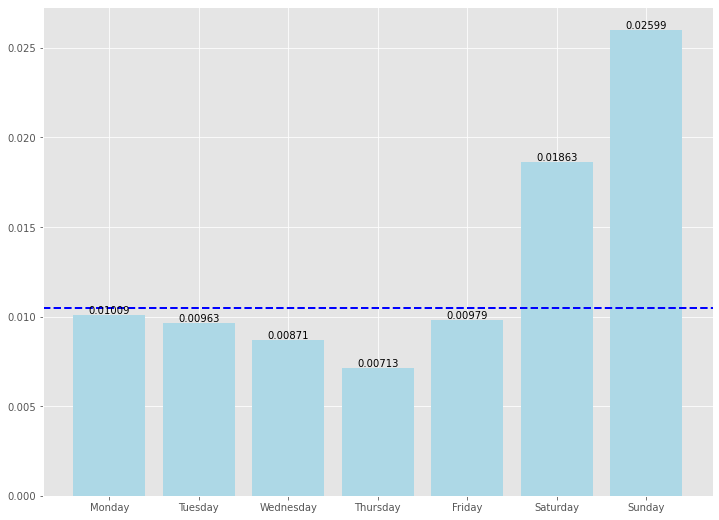

In [43]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (12,9))
plt.bar(data=y_dow, x=y_dow.index, height='Fraud', color='lightblue')
ax.axhline(y=y_avg, ls='--', lw=2, color='blue')

for i, v in enumerate(y_dow.index):
    ax.text(v, y_dow.loc[i,'Fraud']+0.0001, round(y_dow.loc[i,'Fraud'], 5),
           horizontalalignment='center',fontsize=10)
    
plt.show()

In [44]:
data.head().T

,0,1,2,3,4
Recnum,1,2,3,4,5
Cardnum,5142190439,5142183973,5142131721,5142148452,5142190439
Date,2006-01-01 00:00:00,2006-01-01 00:00:00,2006-01-01 00:00:00,2006-01-01 00:00:00,2006-01-01 00:00:00
Merchnum,5509006296254,61003026333,4503082993600,5509006296254,5509006296254
Merch description,FEDEX SHP 12/23/09 AB#,SERVICE MERCHANDISE #81,OFFICE DEPOT #191,FEDEX SHP 12/28/09 AB#,FEDEX SHP 12/23/09 AB#
Merch state,TN,MA,MD,TN,TN
Merch zip,38118,00013,00006,38118,38118
Transtype,P,P,P,P,P
Amount,3.62,31.42,178.49,3.62,3.62
Fraud,0,0,0,0,0


In [45]:
data.shape

(96397, 21)

In [46]:
# trial!
entities=list(data.iloc[:, np.r_[1, 3,4, 10:19]].columns)
entities

['Cardnum',
 'Merchnum',
 'Merch description',
 'card_merch',
 'card_state',
 'card_zip',
 'merch_zip',
 'merch_state',
 'card_merch_zip',
 'card_merch_state',
 'card_state_zip',
 'merch_state_zip']

In [47]:
len(entities)

12

In [48]:
data.dtypes

Recnum                        int64
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
card_merch                   object
card_state                   object
card_zip                     object
merch_zip                    object
merch_state                  object
card_merch_zip               object
card_merch_state             object
card_state_zip               object
merch_state_zip              object
dow                          object
dow_risk                    float64
dtype: object

In [49]:
df1=data.copy()
final=data.copy()
df1['check_date']=df1.Date
df1['check_record']=df1.Recnum
final.shape

(96397, 21)

In [50]:

import timeit
start=timeit.default_timer()
for entity in entities:
    try: print('Run time for the last entity ----------- {}s'.format(timeit.default_timer()-st))
    except: print('')
    st=timeit.default_timer()
    
    ## Day-since variables: # days since I last saw the entity
    df_l=df1[['Recnum','Date', entity]]
    df_r=df1[['check_record', 'check_date', entity, 'Amount']]
    temp=pd.merge(df_l, df_r, left_on=entity, right_on=entity)
    temp1=temp[temp.Recnum>temp.check_record][['Recnum','Date','check_date']].groupby('Recnum')[['Date','check_date']].last()
    mapper=(temp1.Date-temp1.check_date).dt.days
    final[entity+'_day_since']=final.Recnum.map(mapper)
    final[entity+'_day_since'].fillna((final.Date-pd.to_datetime('2006-01-01')).dt.days, inplace=True)
    print('\n' + entity +'_day_since ---> Done')
    
    ## Frequency & Amount variables:
    for time in [0,1,3,7,14,30]:
        temp2=temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) & (temp.Recnum >= temp.check_record)]\
            [['Recnum', entity, 'Amount']]
        col_name=entity+'_count_'+str(time)
        mapper2=temp2.groupby('Recnum')[entity].count()
        final[col_name]=final.Recnum.map(mapper2)
        print(col_name + '---> Done')
        final[entity+'_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity+'_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity+'_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity+'_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity+'_actual/avg_' + str(time)] = final['Amount']/final[entity + '_avg_' + str(time)]
        final[entity+'_actual/max_' + str(time)] = final['Amount']/final[entity + '_max_' + str(time)]
        final[entity+'_actual/med_' + str(time)] = final['Amount']/final[entity + '_med_' + str(time)]
        final[entity+'_actual/total_' + str(time)] = final['Amount']/final[entity + '_total_' + str(time)]
        print(entity+'amount variables over past' + str(time) + '---> Done')
print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))
  



Cardnum_day_since ---> Done
Cardnum_count_0---> Done
Cardnumamount variables over past0---> Done
Cardnum_count_1---> Done
Cardnumamount variables over past1---> Done
Cardnum_count_3---> Done
Cardnumamount variables over past3---> Done
Cardnum_count_7---> Done
Cardnumamount variables over past7---> Done
Cardnum_count_14---> Done
Cardnumamount variables over past14---> Done
Cardnum_count_30---> Done
Cardnumamount variables over past30---> Done
Run time for the last entity ----------- 6.479632299999999s

Merchnum_day_since ---> Done
Merchnum_count_0---> Done
Merchnumamount variables over past0---> Done
Merchnum_count_1---> Done
Merchnumamount variables over past1---> Done
Merchnum_count_3---> Done
Merchnumamount variables over past3---> Done
Merchnum_count_7---> Done
Merchnumamount variables over past7---> Done
Merchnum_count_14---> Done
Merchnumamount variables over past14---> Done
Merchnum_count_30---> Done
Merchnumamount variables over past30---> Done
Run time for the last entity ---

In [51]:
start=timeit.default_timer()
# velocity change variables
for ent in entities:
    for d in ['0', '1']:
        for dd in ['7','14','30']:
            final[ent + '_count_' + d + '_by_' + dd] = final[ent + '_count_' + d]/(final[ent + '_count_' + dd]/float(dd))
print('run time: {}s'.format(timeit.default_timer()-start))


run time: 2.5773247000000197s


#### Benford's Law Variables

In [52]:
# Benford's Law
cleaned_data = data[data['Merch description'].str.match(r"[Ff][Ee][Dd][Ee][Xx]")==False].copy()
cleaned_data['Amount'] = cleaned_data['Amount'].astype(str)

In [53]:
def n_low(df):
    return ((df['Amount'].str.extract(r"([1-9])")=='1') | (df['Amount'].str.extract(r"([1-9])") == '2')).sum()

In [54]:
cardnums=cleaned_data.groupby('Cardnum').apply(n_low)
cardnums['n']=cleaned_data.groupby('Cardnum')['Amount'].count()
cardnums['n_low']=cleaned_data.groupby('Cardnum').apply(n_low)
cardnums=cardnums[['n', 'n_low']]
cardnums['n_high']=cardnums['n'] - cardnums['n_low']

In [55]:
cardnums['n_low']=cardnums['n_low'].replace(0,1)
cardnums['n_high']=cardnums['n_high'].replace(0,1)

In [56]:
cardnums['R'] = 1.096*cardnums['n_low']/cardnums['n_high']
cardnums['1/R'] = 1/cardnums['R']
cardnums['U'] = cardnums[['R', '1/R']].max(axis=1)

In [57]:
import math
e=math.e
cardnums['t']=(cardnums['n']-15)/3
cardnums['U*']=1+((cardnums['U']-1) / (1+e**-cardnums['t']))

In [58]:
cardnums.sort_values('U*', ascending=False)[0:40].to_csv('Top 40 Cardnum.csv')

In [59]:
merchnums = cleaned_data.groupby('Cardnum').apply(n_low)
merchnums['n'] = cleaned_data.groupby('Cardnum')['Amount'].count()
merchnums['n_low'] = cleaned_data.groupby('Cardnum').apply(n_low)
merchnums = merchnums[['n', 'n_low']]
merchnums['n_high'] = merchnums['n'] - merchnums['n_low']

merchnums['n_low']=merchnums['n_low'].replace(0,1)
merchnums['n_high']=merchnums['n_high'].replace(0,1)


In [60]:

merchnums['R'] = 1.096 * merchnums['n_low'] / merchnums['n_high']
merchnums['1/R'] = 1/ merchnums['R']
merchnums['U'] = merchnums[['R', '1/R']].max(axis=1)

merchnums['t'] = (merchnums['n'] - 15)/3
merchnums['U*'] = 1 + ((merchnums['U']-1)/(1+e**-merchnums['t']))



In [61]:
merchnums.sort_values('U*', ascending = False)[0:40].to_csv('Top 40 Merchnum.csv')

In [62]:
final.shape

(96397, 753)

In [63]:
final.to_csv('variables_400.csv')

In [64]:
pd.read_csv('variables_400.csv').head()

,Unnamed: 0,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,...,card_state_zip_count_0_by_30,card_state_zip_count_1_by_7,card_state_zip_count_1_by_14,card_state_zip_count_1_by_30,merch_state_zip_count_0_by_7,merch_state_zip_count_0_by_14,merch_state_zip_count_0_by_30,merch_state_zip_count_1_by_7,merch_state_zip_count_1_by_14,merch_state_zip_count_1_by_30
0,0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,...,30.0,7.0,14.0,30.0,7.0,14.0,30.0,7.0,14.0,30.0
1,1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,00013,P,31.42,...,30.0,7.0,14.0,30.0,7.0,14.0,30.0,7.0,14.0,30.0
2,2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,00006,P,178.49,...,30.0,7.0,14.0,30.0,7.0,14.0,30.0,7.0,14.0,30.0
3,3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,...,30.0,7.0,14.0,30.0,7.0,14.0,30.0,7.0,14.0,30.0
4,4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,...,30.0,7.0,14.0,30.0,7.0,14.0,30.0,7.0,14.0,30.0


In [65]:
'''
data['card_zip']=data['Cardnum']+data['Merch zip']
data['card_merch']=data.Cardnum+data.Merchnum
data['card_state']=data.Cardnum+data['Merch state']
data['merch_zip']=data.Merchnum+data['Merch zip']
data['merch_state']=data.Merchnum+data['Merch state']
data['merch_country']=data.Merchnum+data['country']
data['merch_card_country']=data.Merchnum+data['Cardnum']+data['country']
#data['card_state_zip_country']=data.Cardnum+data['Merch state']+data['Merch zip']+data['Merch state']
data['card_merch_zip']=data.Cardnum+data['Merchnum']+data['Merch zip']
data['card_merch_state']=data.Cardnum+data['Merchnum']+data['Merch state']
#data['card_state_zip']=data.Cardnum+data['Merchnum']+data['Merch state']+data['Merch zip']
#data['merch_state_zip']=data.Merchnum+data['Merch state']+data['Merch zip']
#data['card_state_zip_country']=data.Cardnum+data['Merch state']+data['Merch zip']+data['Merch state']
#data['merch_state_zip_country']=data.Merchnum+data['Merch state']+data['Merch zip']+data['Merch state']
#data['card_merch_zip_country']=data.Cardnum+data['Merchnum']+data['Merch zip']+data['country']
data['card_description_zip']=data.Cardnum+data['Merch description']+data['Merch zip']
data['merch_description_zip']=data.Merchnum+data['Merch description']+data['Merch zip']
# data['card_merch_description_zip']=data.Cardnum+data.Merchnum+data['Merch description']+data['Merch zip']'''

"\ndata['card_zip']=data['Cardnum']+data['Merch zip']\ndata['card_merch']=data.Cardnum+data.Merchnum\ndata['card_state']=data.Cardnum+data['Merch state']\ndata['merch_zip']=data.Merchnum+data['Merch zip']\ndata['merch_state']=data.Merchnum+data['Merch state']\ndata['merch_country']=data.Merchnum+data['country']\ndata['merch_card_country']=data.Merchnum+data['Cardnum']+data['country']\n#data['card_state_zip_country']=data.Cardnum+data['Merch state']+data['Merch zip']+data['Merch state']\ndata['card_merch_zip']=data.Cardnum+data['Merchnum']+data['Merch zip']\ndata['card_merch_state']=data.Cardnum+data['Merchnum']+data['Merch state']\n#data['card_state_zip']=data.Cardnum+data['Merchnum']+data['Merch state']+data['Merch zip']\n#data['merch_state_zip']=data.Merchnum+data['Merch state']+data['Merch zip']\n#data['card_state_zip_country']=data.Cardnum+data['Merch state']+data['Merch zip']+data['Merch state']\n#data['merch_state_zip_country']=data.Merchnum+data['Merch state']+data['Merch zip']+